In [1]:
clear
close all
tic
%%dirContents
Pathname = [pwd filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
eeg_chan=[];
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        %% vhdr_set
        vhdr_path = [Pathname1 filesep filename1{days}];
        suffix = '.vhdr';
        dirContents = dir(fullfile(vhdr_path , ['*' suffix]));%查找vhdr数据
        load_vhdr_name = dirContents.name;
        EEG = pop_loadbv(vhdr_path, load_vhdr_name, [], []);
        EEG = eeg_checkset( EEG );
        % EEG = pop_saveset( EEG, 'filename','Raw_data.set','filepath',vhdr_path);
        %% 查看通道数和soa
        EEG = eeg_checkset( EEG );
        a=isSub*3+days-3;
        eeg_chan(a)=size(EEG.chanlocs,2);
        a=isSub*3+days-3;
        event_num=size(EEG.event,2);
        for t=2:sum(event_num)
            SOA_ms(t-1,a)=(EEG.event(t).latency-EEG.event(t-1).latency)/2000;
        end
        %% 去掉最前面与最后的多余时间
        event_start(1,a)=EEG.event(2).latency-1000;
        event_end(1,a)=EEG.event(sum(event_num)-1).latency+1000;
        EEG = eeg_eegrej( EEG, [0 event_start(1,a); event_end(1,a) 10000000]);
        EEG = eeg_checkset( EEG );
        %% 电极定位
        EEG=pop_chanedit(EEG, 'lookup','E:\\R2021a\\2022-06-ASAP_ICA_EEG_ArtifactRejection_v1\\2022-06-ASAP_ICA_EEG_ArtifactRejection_v1\\Environment\\eeglab2022.1\\plugins\\dipfit\\standard_BEM\\elec\\standard_1005.elc');
        EEG = eeg_checkset( EEG );
        %% 去除电极
        if EEG.nbchan==65
            EEG = pop_select( EEG, 'nochannel',{'EOG','BIP13'});
        else
            EEG = pop_select( EEG, 'nochannel',{'EOG'});
        end
        EEG = eeg_checkset( EEG );
        % EEG = pop_saveset( EEG, 'filename','VI.set','filepath',[Pathname1 filesep filename1{days}]);
        %% filtered
          EEG  = pop_basicfilter( EEG,  1:61 , 'Boundary', 'boundary', 'Cutoff',  50, 'Design', 'notch', 'Filter', 'PMnotch', 'Order',  180 ); % GUI: 13-Sep-2023 22:31:54
        EEG = eeg_checkset( EEG );
       %EEG = pop_saveset( EEG, 'filename','Filtered_data.set','filepath',[Pathname1 filesep filename1{days}]);
    end
end


isSub =

     1

pop_loadbv(): reading header file
Done.
pop_loadbv(): reading EEG data
pop_loadbv(): scaling EEG data
pop_loadbv(): reading marker file
Done.
eeg_insertbound(): 2 boundary (break) events added.
eeg_checkset note: event field format 'visible' made uniform
eeg_checkset note: event field format 'code' made uniform
readlocs(): 'elc' format assumed from file extension
Reading file (lines): 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 702
Channel lookup: no location for EOG
Send us standard location for your channels at eeglab@sccn.ucsd.edu
Note for expert users: Nose direction is now set from '+Y' to default +X in EEG.chanlocs
Removing 1 channel(s)...
Channels to be filtered : [ 1:61]


Stop-band (Parks-McClellan Notch) filtering input data (fc = [ 50


isSub =

    13

pop_loadset(): loading file D:\dataset\健康人数据\data_64\13-jiangyanxin\first\Spatial_filtered_ICA.set ...
Reading float file 'D:\dataset\健康人数据\data_64\13-jiangyanxin\first\Spatial_filtered_ICA.fdt'...
Channels to be filtered : [ 1:63]


High-pass filtering input data (fc =  2 Hz) from segment 1 to 475628 (in samples), please wait...

High-pass filtering input data (fc =  2 Hz) from segment 475629 to 515433 (in samples), please wait...

High-pass filtering input data (fc =  2 Hz) from segment 515434 to 795981 (in samples), please wait...

High-pass filtering input data (fc =  2 Hz) from segment 795982 to 1.21065e+06 (in samples), please wait...

High-pass filtering input data (fc =  2 Hz) from segment 1.21066e+06 to 1.22166e+06 (in samples), please wait...

High-pass filtering input data (fc =  2 Hz) from segment 1.22166e+06 to 1.4921e+06 (in samples), please wait...

High-pass filtering input data (fc =  2 Hz) from segment 1.4921e+06 to 1.56051e+06 (in samples), please w

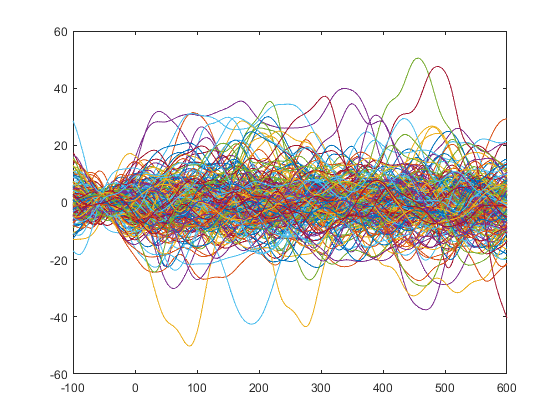

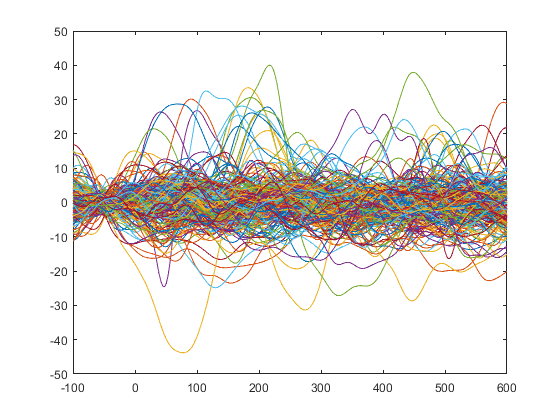

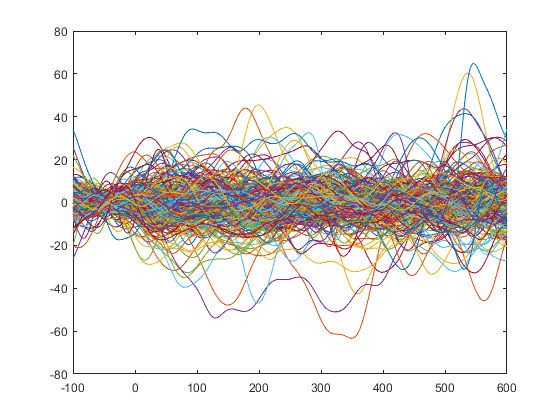

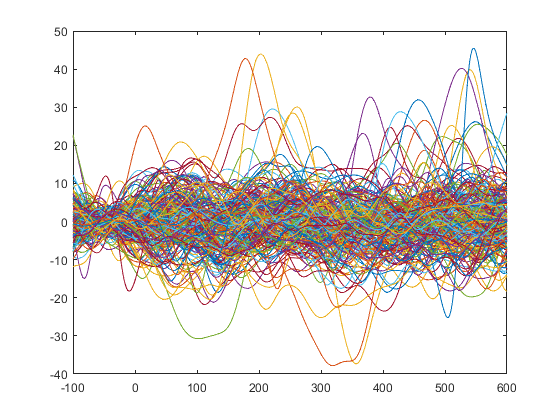

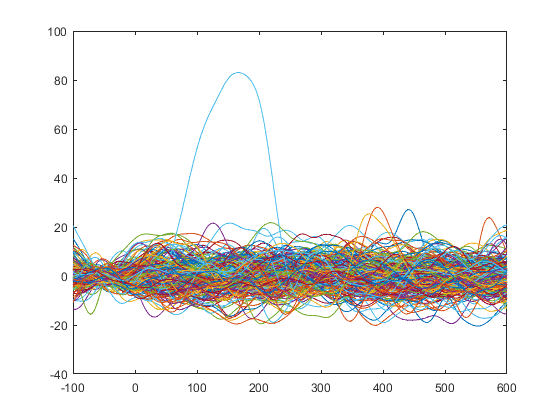

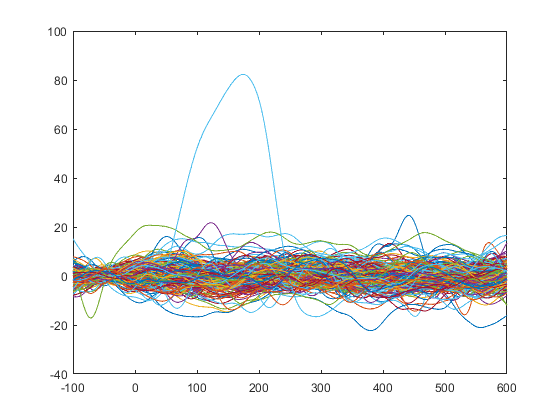

In [2]:
clc
clear
close all
tic
%%
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
filt=1;
%ICA=1,ICA为高通
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
Fz=6;
%% 去坏段
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        STD_list=[];
        STD_fre_list=[];
        STD_name_list=[];
        STD_In_list=[];
        STD_time_list=[];
        
        DEV_Fre_list=[];
        DEV_name_list=[];
        DEV_time_list=[];
        DEV_In_list=[];
        bad_epochs_idexs=[];
        remove_epochs=[];
        EEG = pop_loadset('filename','Spatial_filtered_ICA.set','filepath',[Pathname1 filesep filename1{days}] ) ;
        EEG  = pop_basicfilter( EEG,  1:63 , 'Boundary', 'boundary', 'Cutoff',  2, 'Design', 'butter', 'Filter', 'highpass', 'Order',  2 ); % GUI: 13-Sep-2023 22:32:41
        EEG = eeg_checkset( EEG );
        EEG  = pop_basicfilter( EEG,  1:63 , 'Boundary', 'boundary', 'Cutoff',  10, 'Design', 'butter', 'Filter', 'lowpass', 'Order',  2 ); % GUI: 13-Sep-2023 22:32:41
        EEG = eeg_checkset( EEG );
        EEG = pop_reref( EEG, [13 19]);
        EEG = eeg_checkset( EEG );
        EEG = pop_epoch( EEG, {  's11'  's12'  's13'  's14'  's15'  }, [-0.1  0.6], 'newname', ' resampled pruned with ICA epochs', 'epochinfo', 'yes');
        EEG = eeg_checkset( EEG );
        EEG = pop_rmbase( EEG, [-100 0] ,[]);
        EEG = eeg_checkset( EEG );
        %  EEG = pop_saveset( EEG, 'filename','epoched.set','filepath',[Pathname1 filesep filename1{days}]);
        % 设置阈值参数
        threshvalue = 50; % 阈值，单位：微伏
        a=1;
        for i = 1:size(EEG.data,3)
            segment = abs(squeeze(EEG.data(:,:,i))); % 获取当前段的数据
            for n=1:size(segment,2)
                % 如果超过阈值，则将当前段标记为坏段
                if segment(:,n) > threshvalue
                    bad_epochs_idexs(a)=i ;
                    %去除重合
                    bad_epochs_idexs=unique(bad_epochs_idexs);
                    bad_epochs_idexs = bad_epochs_idexs(bad_epochs_idexs ~= 0);
                    a=a+1;
                else
                end
            end
        end
        b=1;
        for bad_index=1:length(bad_epochs_idexs)-1
            bad_epochs=bad_epochs_idexs(bad_index);
            if strcmp(EEG.event( bad_epochs).type, 's11') && ~strcmp(EEG.event( bad_epochs+1).type, 's11')
                remove_epochs(b)=bad_epochs;
                remove_epochs(b+1)=bad_epochs+1;
                remove_epochs=unique(remove_epochs);
                remove_epochs= remove_epochs( remove_epochs~= 0);
                b=b+2;
            elseif ~strcmp(EEG.event( bad_epochs).type, 's11') && strcmp(EEG.event( bad_epochs-1).type, 's11')
                remove_epochs(b)=bad_epochs-1;
                remove_epochs(b+1)=bad_epochs;
                remove_epochs=unique(remove_epochs);
                remove_epochs= remove_epochs( remove_epochs~= 0);
                b=b+2;
            elseif strcmp(EEG.event( bad_epochs).type, 's11')&& strcmp(EEG.event( bad_epochs+1).type, 's11')
                remove_epochs(b)=bad_epochs;
                remove_epochs=unique(remove_epochs);
                remove_epochs= remove_epochs( remove_epochs~= 0);
                b=b+1;
            end
        end
        % 使用 unique() 函数去除重复元素
        unique_bad_epochs = unique(remove_epochs);
        EEG.data(:,:,unique_bad_epochs)=[];
        EEG.event(unique_bad_epochs)=[];
        EEG.epoch(unique_bad_epochs)=[];
        STD_num=1;
        STD_fre_num=1;
        STD_name_num=1;
        STD_In_num=1;
        STD_time_num=1;
        
        DEV_Fre_num=1;
        DEV_name_num=1;
        DEV_time_num=1;
        DEV_In_num=1;
        for list_epoch=1:size( EEG.data,3)-1
            if strcmp(EEG.event(list_epoch).type, 's11')  && strcmp(EEG.event( list_epoch+1).type, 's11')
                STD_list(STD_num)=list_epoch;
                STD_num=STD_num+1;
            elseif strcmp(EEG.event(list_epoch).type, 's12')
                DEV_Fre_list(DEV_Fre_num)=list_epoch;
                DEV_Fre_num=DEV_Fre_num+1;
                STD_fre_list(STD_fre_num)=list_epoch-1;
                STD_fre_num=STD_fre_num+1;
            elseif strcmp(EEG.event(list_epoch).type, 's13')
                DEV_name_list(DEV_name_num)=list_epoch;
                DEV_name_num=DEV_name_num+1;
                STD_name_list(STD_name_num)=list_epoch-1;
                STD_name_num=STD_name_num+1;
            elseif strcmp(EEG.event(list_epoch).type, 's14')
                DEV_time_list(DEV_time_num)=list_epoch;
                DEV_time_num=DEV_time_num+1;
                STD_time_list(STD_time_num)=list_epoch-1;
                STD_time_num=STD_time_num+1;
            elseif strcmp(EEG.event(list_epoch).type, 's15')
                DEV_In_list(DEV_In_num)=list_epoch;
                DEV_In_num=DEV_In_num+1;
                STD_In_list(STD_In_num)=list_epoch-1;
                STD_In_num=STD_In_num+1;
            end
        end
        STD=EEG.data(:,:,STD_list);
        STD_fre=EEG.data(:,:,STD_fre_list);
        STD_name=EEG.data(:,:,STD_name_list);
        STD_time=EEG.data(:,:,STD_time_list);
        STD_In=EEG.data(:,:,STD_In_list);
        DEV_Fre= EEG.data(:,:,DEV_Fre_list);
        DEV_name=EEG.data(:,:,DEV_name_list);
        DEV_time=EEG.data(:,:,DEV_time_list);
        DEV_In=EEG.data(:,:,DEV_In_list);
        channel=EEG.chanlocs;
        %% 差异波
        figure(days)
        time=linspace(-100,600,350);
        for i=1:size(STD_fre,3)
            diff_fre=squeeze(DEV_Fre(Fz,:,i)-STD_fre(Fz,:,i));
            if diff_fre(:)>20
                DEV_Fre(:,:,i)=[];
                STD_fre(:,:,i)=[];
            else
                plot(time,squeeze(DEV_Fre(Fz,:,i)-STD_fre(Fz,:,i)));
                hold on              
            end           
        end
        figure(days+3)
        for v=1:size(DEV_Fre,3)
         plot(time,squeeze(DEV_Fre(Fz,:,v)));
                hold on              
        end           
       % fileDir=[Pathname1 filesep filename1{days}];
        %savepath=strcat(fileDir,'\epoched');%拼接路径和文件名
        %save(savepath,'STD','STD_fre','STD_name','STD_time','STD_In','DEV_Fre','DEV_name','DEV_time','DEV_In','channel')%指定存储路径 存储名称和存储进去的变量
    end
end